In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import datetime

# Set visual style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [3]:
# Load the hybrid model with attention mechanism
model = tf.keras.models.load_model('hybrid_cnn_with_attention.keras')

In [4]:
# Display model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [16]:
# Define the image path for testing
image_path = "test/PotatoEarlyBlight1.JPG"

In [17]:
# Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR Image to RGB

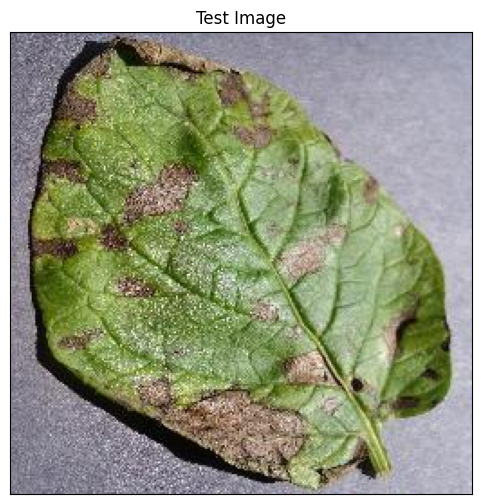

In [18]:
# Display Image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


In [19]:
# Preprocess the image for the model
image = tf.keras.utils.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # convert single image to a batch
print(f"Input shape: {input_arr.shape}")

Input shape: (1, 128, 128, 3)


In [20]:
# Make prediction
prediction = model.predict(input_arr)
print(f"Prediction shape: {prediction.shape}")

1/1 [==============================] - 0s 28ms/step
Prediction shape: (1, 38)


In [21]:
# Get the index of the highest probability class
result_index = np.argmax(prediction)
confidence = prediction[0][result_index] * 100

In [22]:
# Define class names
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 
               'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 
               'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 
               'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 
               'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 
               'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
               'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 
               'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 
               'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 
               'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
               'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 
               'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 
               'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


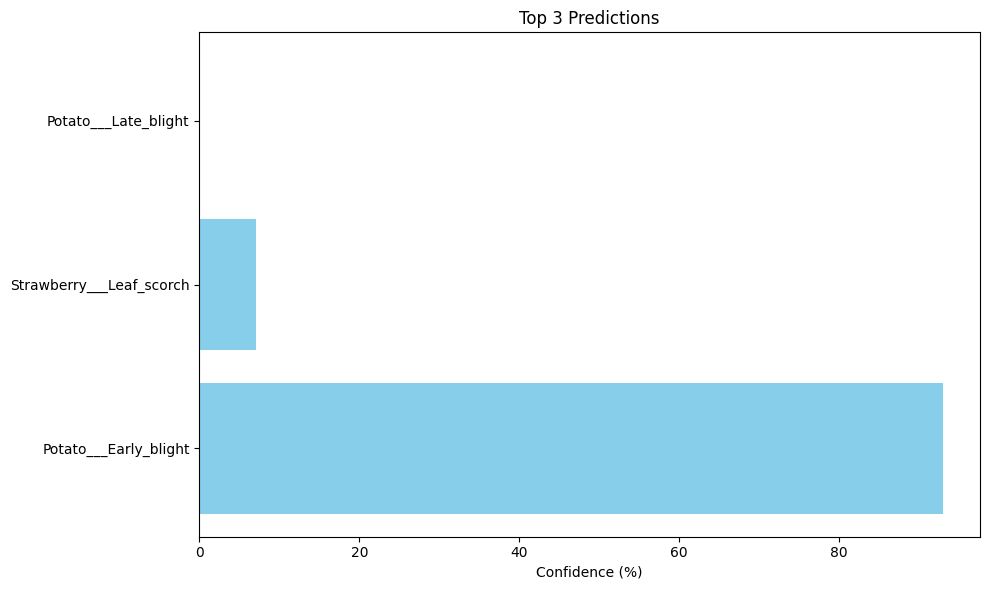

In [23]:
# Display top 3 predictions
top_indices = np.argsort(prediction[0])[-3:][::-1]
plt.figure(figsize=(10, 6))
plt.barh([class_names[i] for i in top_indices], [prediction[0][i] * 100 for i in top_indices], color='skyblue')
plt.xlabel('Confidence (%)')
plt.title('Top 3 Predictions')
plt.tight_layout()
plt.show()

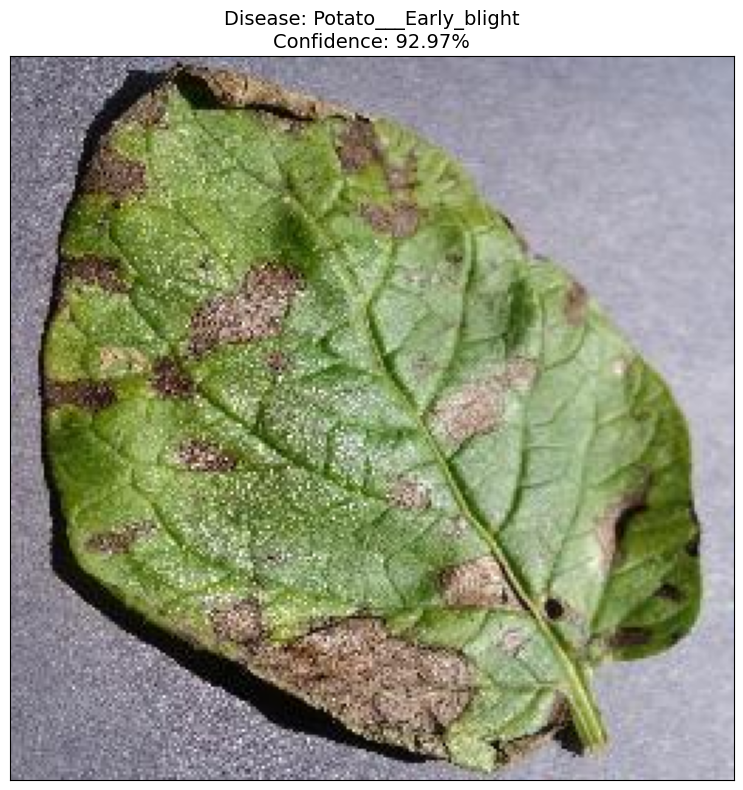

In [24]:
# Displaying Result of disease prediction
model_prediction = class_names[result_index]
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nConfidence: {confidence:.2f}%", fontsize=14)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [25]:
print(f"Predicted Disease: {model_prediction}")
print(f"Confidence: {confidence:.2f}%")

Predicted Disease: Potato___Early_blight
Confidence: 92.97%


In [26]:
# If it's a disease (not healthy), provide some basic info
if "_healthy" not in model_prediction:
    disease_name = model_prediction.split("___")[1].replace("_", " ")
    print(f"\nDisease Information: {disease_name}")
    print("Recommended next steps:")
    print("1. Confirm diagnosis with a plant pathologist if needed")
    print("2. Consider appropriate treatment options based on this initial diagnosis")
    print("3. Monitor the plant for changes in symptoms")
else:
    print("\nGood news! The plant appears to be healthy.")


Disease Information: Early blight
Recommended next steps:
1. Confirm diagnosis with a plant pathologist if needed
2. Consider appropriate treatment options based on this initial diagnosis
3. Monitor the plant for changes in symptoms
